In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import nltk

In [ ]:
df=pd.read_csv('emails.csv')
df.head()

In [19]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [20]:
df.shape

(5728, 2)

In [21]:
df.dtypes

text    object
spam     int64
dtype: object

In [22]:
#if there are yes or no in spam column then do label encoder
lb=LabelEncoder()
df['spam']=lb.fit_transform(df['spam'])

In [23]:
df.duplicated().sum()

33

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(5695, 2)

In [27]:
spam_count=df['spam'].value_counts()

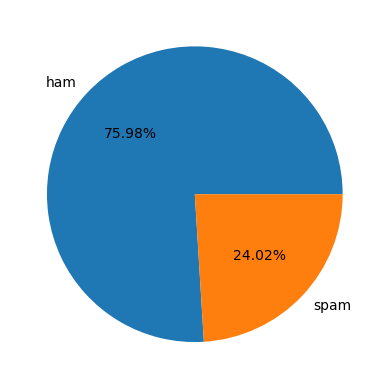

In [63]:
plt.pie(spam_count,autopct="%0.2f%%",labels=['ham','spam'])
plt.show()

In [ ]:
stop_words=set(stopwords.words('english'))
stop_words

In [32]:
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('wordnet')
lemma=WordNetLemmatizer()

def transfrom_text(text):
    text=text.lower()
    text=lemma.lemmatize(text)
    token=nltk.word_tokenize(text)
    y=[i for i in token if i.isalnum() and i not in stop_words]
    return " ".join(y)

In [33]:
df['transformed_text']=df['text'].apply(transfrom_text)

In [65]:
df.head()

,text,spam,transformed_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,subject 4 color printing special request addit...
4,"Subject: do not have money , get software cds ...",1,subject money get software cds software compat...


In [36]:
from wordcloud import WordCloud
wc=WordCloud()

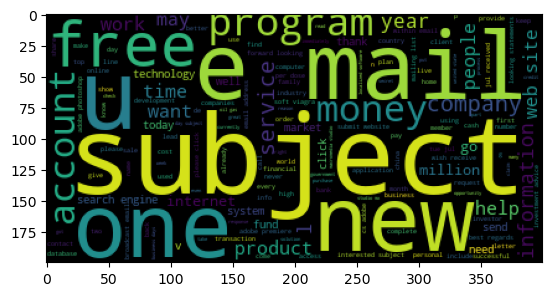

In [39]:
spam_wc=wc.generate(' '.join(df[df['spam']==1]['transformed_text']))
plt.imshow(spam_wc)

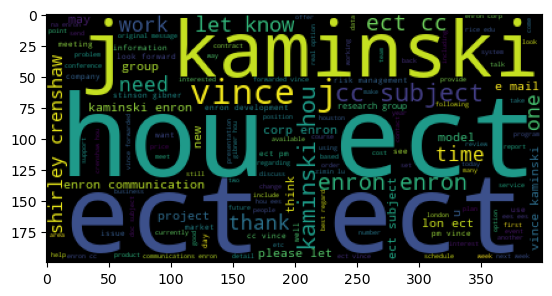

In [42]:
spam_wc=wc.generate(' '.join(df[df['spam']==0]['transformed_text']))
plt.imshow(spam_wc)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [44]:
x=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['spam'].values

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)

In [48]:
accuracy_score(ytest,y_pred)*100

97.1027216856892

In [57]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       843
           1       0.99      0.90      0.94       296

    accuracy                           0.97      1139
   macro avg       0.98      0.95      0.96      1139
weighted avg       0.97      0.97      0.97      1139



<Axes: >

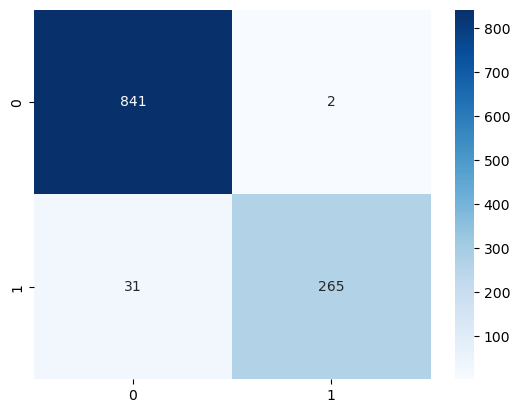

In [62]:
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')